## PyTorch Tutorial 07 - Linear Regression

In [1]:
# Desing mode (input,output,forward pass)
# Construct loss and optimizer
# Training loop

In [4]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

In [10]:
x_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

In [11]:
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [12]:
y = y.view(-1,1)

In [17]:
n_sample,n_features = x.shape
output_size=1

In [18]:
model = nn.Linear(in_features=n_features,out_features=output_size)

In [20]:
#defining loss
criterion = nn.MSELoss()

In [21]:
#optimizer
lr=0.01
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

In [24]:
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass 
    y_pred = model(x)
    #loss
    loss = criterion(y,y_pred)

    loss.backward()
    #update weight

    optimizer.step()

    optimizer.zero_grad()

    if epoch%10==0:
        print(f"epoch {epoch+1}: loss: {loss.item():.4f} ")


epoch 1: loss: 5720.9531 
epoch 11: loss: 4238.4004 
epoch 21: loss: 3166.3970 
epoch 31: loss: 2390.3894 
epoch 41: loss: 1828.0676 
epoch 51: loss: 1420.2008 
epoch 61: loss: 1124.1025 
epoch 71: loss: 908.9691 
epoch 81: loss: 752.5444 
epoch 91: loss: 638.7286 


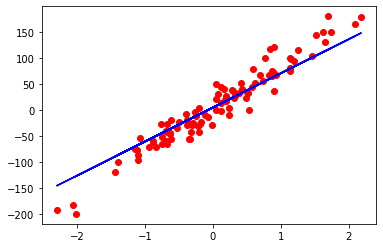

In [25]:
#remove from computation graph
predicted  = model(x).detach().numpy()
plt.plot(x_numpy,y_numpy,"ro")
plt.plot(x_numpy,predicted,'b')
plt.show()
